## Alexander's Test Script

In [143]:
import numpy as np

from model import *
import csv

# My Imports
import pandas as pd
from scipy.stats import pareto
import scipy

In [144]:
r_incomes = []
incomes = []
counts = []

with open('incomes.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        r_incomes.append(row)
        incomes.append([int(row[0]) * 1000 / 12, int(row[1]) * 1000 / 12])
        counts.append(int(row[2]))

cum_counts = []
for i in range(len(counts)):
    cum_counts.append(sum(counts[:i + 1]))

hhld_count = sum(counts)

cum_ratios = [x / hhld_count for x in cum_counts]


# Plotting CSV Data

<AxesSubplot:title={'center':'Income Distribution'}>

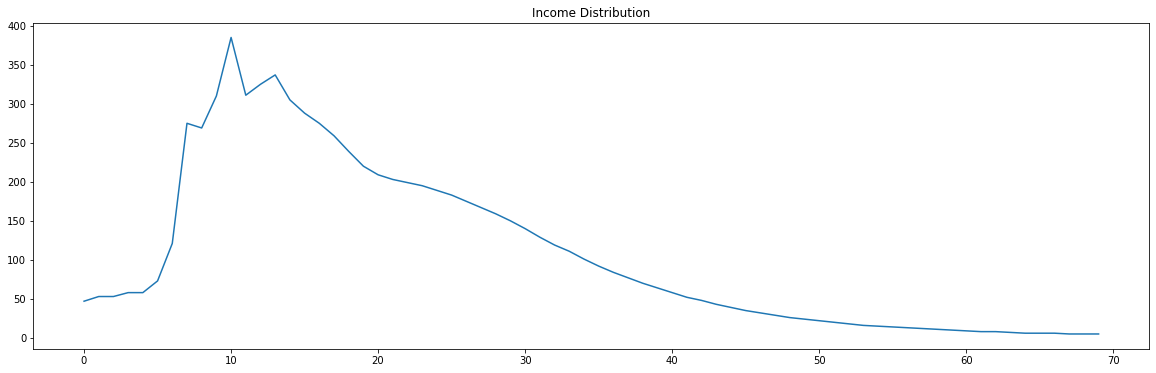

In [145]:
ri = pd.DataFrame(r_incomes, columns=['LI', 'HI', 'N']).astype(int)
ri.N.plot(figsize=(20,6), title='Income Distribution')

,Income_M
count,7679.000000
mean,3484.969831
std,2028.657188
min,83.333333
25%,1916.666667
50%,3083.333333
75%,4583.333333
max,11583.333333


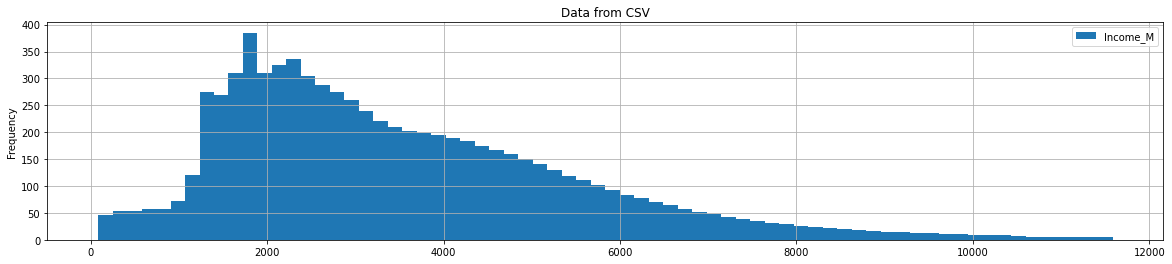

In [146]:
""" Convert to individual Data """
r_incomes = np.array(r_incomes, dtype=int)
data = []
for row in r_incomes:
    for _ in range(row[2]):
        data.append( np.mean([row[1], row[0]]) * 1000 /12 )


""" Analysing Income Data """
data_df = pd.DataFrame(data, columns=['Income_M'])
data_df.plot.hist(bins=70, figsize=(20,4), title="Data from CSV", grid=True)
data_df.describe()

# Chi-Squared Distribution Approach

,Constructed,CSV
count,10000.000000,7679.000000
mean,3532.469269,3484.969831
std,1958.201756,2028.657188
min,42.698729,83.333333
25%,2083.169820,1916.666667
50%,3198.983794,3083.333333
75%,4605.417791,4583.333333
max,14647.753201,11583.333333


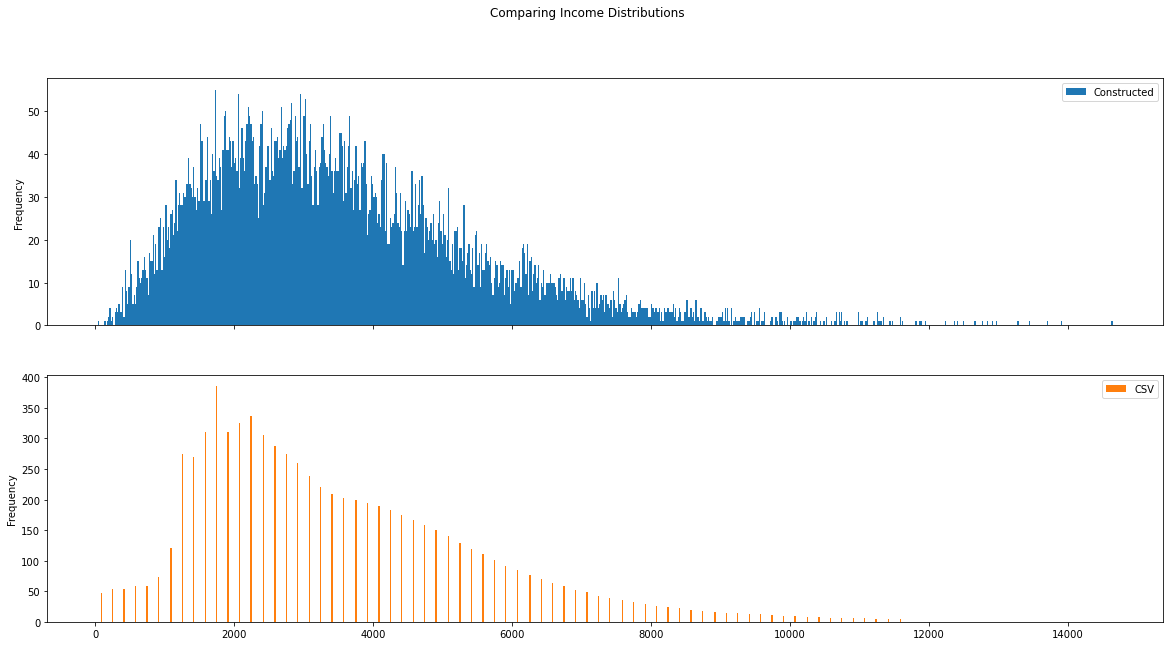

In [147]:
combined_df = pd.DataFrame()

parameter   = 6.5
size        = 10_000
cd = scipy.random.chisquare(parameter, size=size)

""" Scale for Std """
cd = cd / (2*parameter)**1/2

""" Adjust Mean so ~= 2600 """
mean_chi = parameter / (2*parameter)**1/2
cd = cd * (3484 / mean_chi)
combined_df['Constructed'] = np.sort(cd)
combined_df['CSV'] = data_df.Income_M

""" Plot Both Distributions """
combined_df.plot.hist(bins=800, figsize=(20,10), title="Comparing Income Distributions", subplots=True)

""" Describe Combined """
combined_df.describe()

** Not important
## Pareto Distribution of the Income Inequality

Pareto's distribution is used when modeling the income for different percentiles of a population. As percentiles increase, the Income grows exponentially following approximately the Pareto's distribution.
#### Pareto PDF:

$ f(x, b) = \frac{b}{x^{b+1}}$ , $x \geq 1,  b > 1 $

In this case x = 1, by fitting to the data and getting alpha, we can describe the degree of the income inequality

,CSV,Constructed
Percentile,,
0,83.333333,42.698729
1,250.000000,520.548385
2,583.333333,702.357426
3,750.000000,836.539950
4,916.666667,931.731017
...,...,...
96,7750.000000,7530.678363
97,8250.000000,7974.788000
98,8916.666667,8578.994271


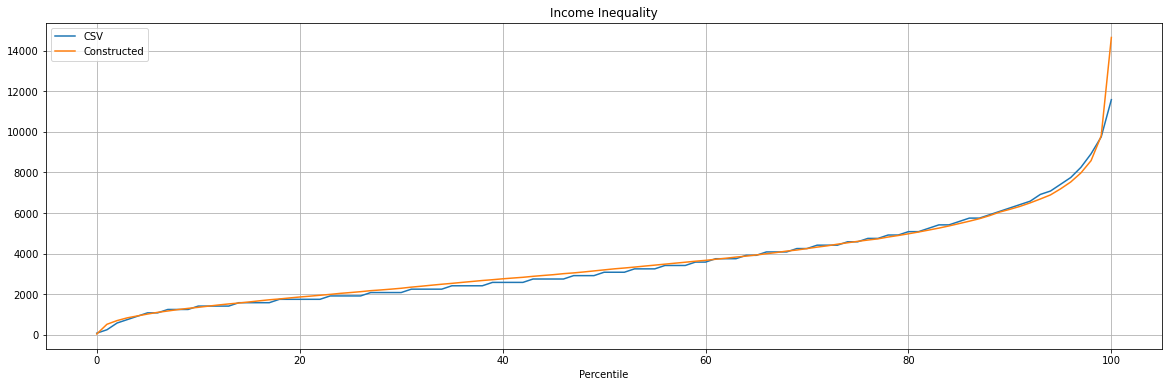

In [148]:
data_p = []
cd_p  = []
df_index = []
for percentile in range (101):
    df_index.append(percentile)
    data_p.append(combined_df.CSV.quantile(percentile/100))
    cd_p.append(combined_df.Constructed.quantile(percentile/100))

percentile_df = pd.DataFrame()
percentile_df['Percentile'] = df_index
percentile_df['CSV'] = data_p
percentile_df['Constructed'] = cd_p
percentile_df.set_index('Percentile', inplace=True)
percentile_df.plot(figsize=(20,6), title="Income Inequality", grid=True)
percentile_df

# Model Age Income Distribution
Income Data from the source is used a reference to calculate the income age distribution, relative to the mean income

TODO: Add Dutch Equivalent
data source : https://dqydj.com/average-median-top-income-by-age-percentiles/

In [149]:
Age_Average_Income = {
16	:5821.30,
17	:6760.37,
18	:9725.23,
19	:15062.78,
20	:18513.14,
21	:20712.18,
22	:24447.43,
23	:29814.28,
24	:33164.56,
25	:41461.27,
26	:43945.65,
27	:48376.91,
28	:47399.65,
29	:51638.49,
30	:52706.53,
31	:59068.01,
32	:58708.88,
33	:59082.00,
34	:60506.92,
35	:66320.38,
36	:68082.22,
37	:69128.48,
38	:66746.23,
39	:70235.80,
40	:72731.18,
41	:77143.30,
42	:71286.43,
43	:83279.50,
44	:74478.19,
45	:79101.10,
46	:75233.96,
47	:78354.08,
48	:68728.45,
49	:75458.16,
50	:81711.22,
51	:75777.31,
52	:80279.55,
53	:80802.58,
54	:77406.45,
55	:77308.78,
56	:76857.49,
57	:78139.14,
58	:73165.04,
59	:78624.85,
60	:73392.66,
61	:77592.46,
62	:77624.55,
63	:77189.64,
64	:73604.15,
65	:74420.36,
66	:79289.75,
67	:93445.14,
68	:84150.09,
69	:82464.49,
70	:76164.60,
71	:76744.71,
72	:98444.27,
73	:92254.10,
74	:70337.44,
75	:70820.15
}

,Original,Coefficient,Dutch
Age,,,
16,485.108333,0.090929,321.202457
17,563.364167,0.105597,373.017617
18,810.435833,0.151908,536.609996
19,1255.231667,0.235280,831.120530
20,1542.761667,0.289175,1021.501392
21,1726.015000,0.323524,1142.838043
22,2037.285833,0.381868,1348.938309
23,2484.523333,0.465698,1645.065533
24,2763.713333,0.518030,1829.924270


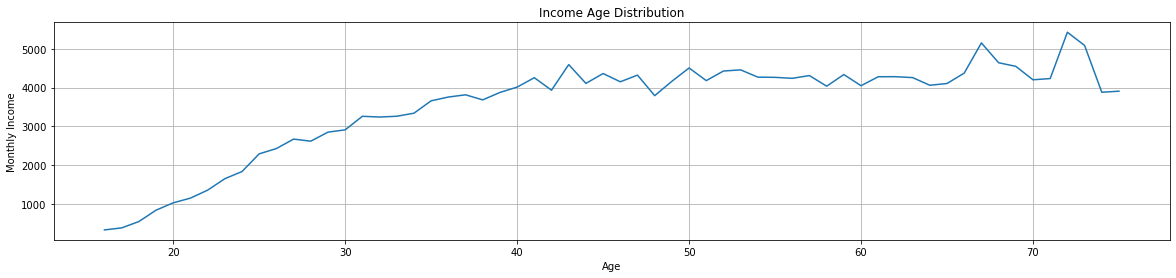

In [150]:
aid = pd.DataFrame.from_dict(Age_Average_Income, orient='index', columns=['Original'])
aid.index.rename('Age', inplace=True)

""" Adjust for Monthly Income """
aid.Original = aid.Original / 12

""" Adjust Relative to the Mean """
aid['Coefficient'] = aid.Original / aid.Original.mean()
aid['Dutch'] = aid.Coefficient * combined_df.Constructed.mean()
aid.Dutch.plot(figsize=(20,4), title="Income Age Distribution", ylabel='Monthly Income', grid=True)

""" Numpy array of Age Coefficient """
age_coef = aid.Coefficient.to_numpy()
aid

# Function to use in the Model

,Constructed,CSV
count,10000.000000,7679.000000
mean,5062.189966,3484.969831
std,2797.946373,2028.657188
min,141.647533,83.333333
25%,2993.136562,1916.666667
50%,4564.146865,3083.333333
75%,6583.496307,4583.333333
max,22278.948668,11583.333333


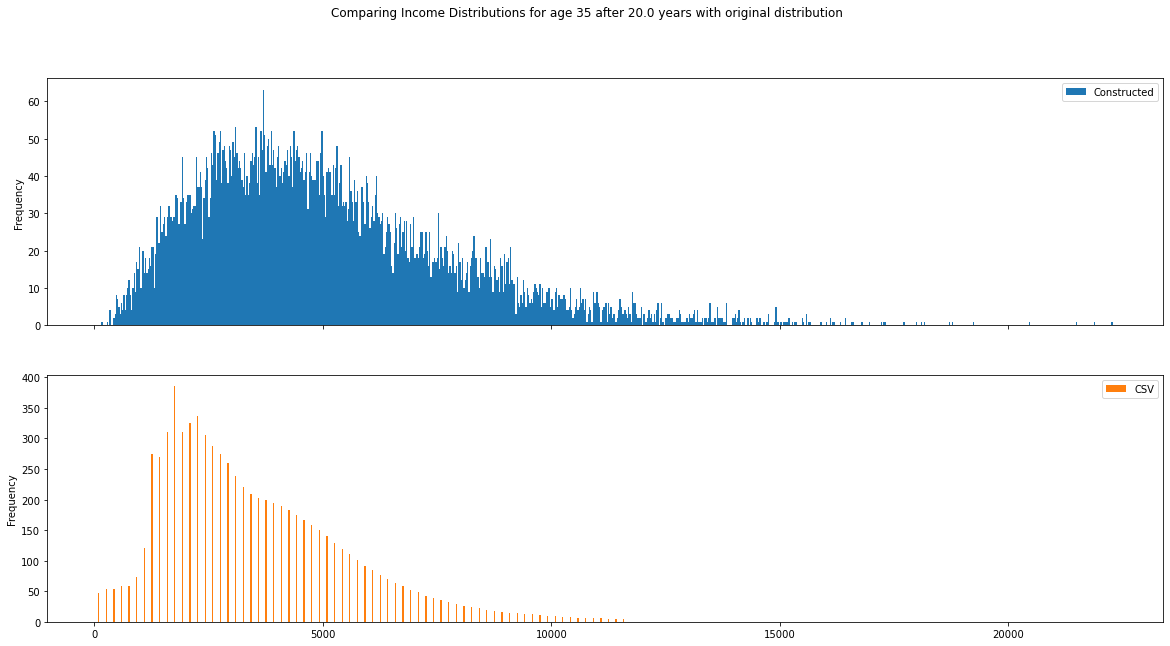

In [151]:
age = 35    ;   step = 12 * 20
def get_income(age, step):
    age_coef_dict = {
    18: 0.15190790211711158,
    19: 0.2352803285733691,
    20: 0.28917488419300963,
    21: 0.3235238459215871,
    22: 0.38186837776123933,
    23: 0.4656984696436133,
    24: 0.5180297776234675,
    25: 0.6476242253202377,
    26: 0.6864301922600129,
    27: 0.7556463866672888,
    28: 0.7403816046083588,
    29: 0.8065922023844624,
    30: 0.8232749662653331,
    31: 0.9226411592664203,
    32: 0.9170315557005079,
    33: 0.9228596827924056,
    34: 0.9451169052832582,
    35: 1.0359230366181207,
    36: 1.063442942909901,
    37: 1.079785503617365,
    38: 1.042574805277224,
    39: 1.0970818203288792,
    40: 1.1360596070532032,
    41: 1.2049768350353642,
    42: 1.1134926403507501,
    43: 1.3008241588488905,
    44: 1.163347869035451,
    45: 1.2355576326889808,
    46: 1.1751529816325876,
    47: 1.2238891949204627,
    48: 1.073537042852539,
    49: 1.1786549812413019,
    50: 1.2763276559659535,
    51: 1.183640097990281,
    52: 1.2539649986073098,
    53: 1.2621347169630002,
    54: 1.2090872328811855,
    55: 1.2075616293941958,
    56: 1.2005124884333722,
    57: 1.2205318363303777,
    58: 1.142836491755419,
    59: 1.2281186170170353,
    60: 1.1463919116971477,
    61: 1.2119927054379072,
    62: 1.2124939506093775,
    63: 1.2057006649277273,
    64: 1.1496953813548059,
    65: 1.1624445655681364,
    66: 1.2385043419939938,
    67: 1.4596112565399266,
    68: 1.3144227575971088,
    69: 1.2880937186120562,
    70: 1.1896895602046387,
    71: 1.198750867042334,
    72: 1.537697569224636,
    73: 1.4410072350681913,
    74: 1.098669435138111,
    75: 1.1062093558835275,
    76: 1.1062093558835275,
    77: 1.1062093558835275,
    78: 1.1062093558835275,
    79: 1.1062093558835275,
    80: 1.1062093558835275,
    81: 1.1062093558835275,
    82: 1.1062093558835275,
    83: 1.1062093558835275,
    84: 1.1062093558835275,
    85: 1.1062093558835275,
    86: 1.1062093558835275,
    87: 1.1062093558835275,
    88: 1.1062093558835275,
    89: 1.1062093558835275,
    90: 1.1062093558835275,
    91: 1.1062093558835275,
    92: 1.1062093558835275,
    93: 1.1062093558835275,
    94: 1.1062093558835275,
    95: 1.1062093558835275,
    96: 1.1062093558835275,
    97: 1.1062093558835275,
    98: 1.1062093558835275,
    99: 1.1062093558835275,
    100: 1.1062093558835275
     }
    """
    age (integer)   : from [18, 100] (inclusive)
    step            : to be perceived as a month, to increase income with inflation.
    """
    parameter   = 6.5
    inflation = 1 + 0.02 * (step / 12)
    cd = scipy.random.chisquare(parameter, size=10000)

    """ Scale for Std """
    cd = cd / (2*parameter)**1/2

    """ Adjust Mean so ~= 3484 (mean monthly Dutch Household Income) """
    mean_chi = parameter / (2*parameter)**1/2
    cd = cd * (3484 / mean_chi) * age_coef_dict[age] * np.random.normal(loc=inflation, scale=.002, size=1)
    return cd

combined_df['Constructed'] = np.sort(get_income(age, step))
combined_df['CSV'] = data_df.Income_M

""" Plot Both Distributions """
combined_df.plot.hist(bins=800, figsize=(20,10), title=f"Comparing Income Distributions for age {age} after {step/12:.1f} years with original distribution", subplots=True)

""" Describe Combined """
combined_df.describe()

# Get Initial House Price Function

,Constructed
count,1.000000e+04
mean,4.012534e+05
std,2.234831e+05
min,3.617268e+03
25%,2.375799e+05
50%,3.615498e+05
75%,5.195354e+05
max,1.771456e+06


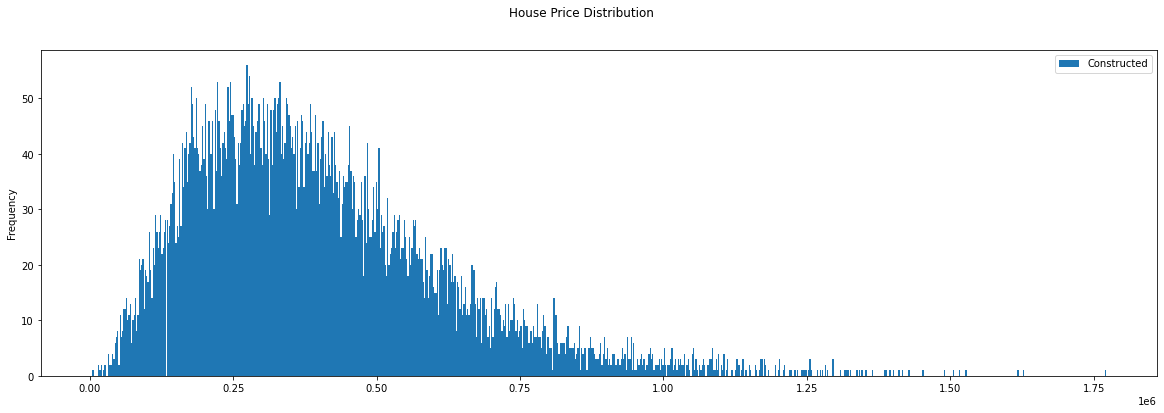

In [164]:
def get_initial_house_price():
    mean_house_price = 400_000
    parameter   = 6.5
    cd = scipy.random.chisquare(parameter, size=1000)

    """ Scale for Std """
    cd = cd / (2*parameter)**1/2

    """ Adjust Mean so ~= 3484 (mean monthly Dutch Household Income) """
    mean_chi = parameter / (2*parameter)**1/2
    cd = cd * (1 / mean_chi) * mean_house_price
    return cd

_df = pd.DataFrame()
_df['Constructed'] = get_initial_house_price()

""" Plot Both Distributions """
_df.plot.hist(bins=800, figsize=(20,6), title=f"House Price Distribution", subplots=True)

""" Describe Combined """
_df.describe()

# Generate 3D data
incomes format      = (lower_bound, upper_bound)
cum_ratios format   = (age, cum_ratios)

In [153]:
data = []
with open('incomes.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        data.append([int(row[0]) * 1000 / 12, int(row[1]) * 1000 / 12, int(row[2])])
data = np.array(data).astype(float)
data[:,2] = np.cumsum(data[:,2]/data[:,2].sum())
bins = (data[:, 1]).flatten()
bins = np.insert(bins, 0, 0)
# bins

In [154]:
data_3d = []
for c in age_coef:
    data_3d.append(c * np.sort(cd))
data_3d = np.array(data_3d).T
pd.DataFrame(data_3d)
data_3d

array([[3.88253531e+00, 4.50885116e+00, 6.48627436e+00, ...,
        6.15291775e+01, 4.69117886e+01, 4.72337336e+01],
       [1.36470370e+01, 1.58485251e+01, 2.27991296e+01, ...,
        2.16273876e+02, 1.64894035e+02, 1.66025665e+02],
       [1.55027829e+01, 1.80036330e+01, 2.58993918e+01, ...,
        2.45683144e+02, 1.87316590e+02, 1.88602101e+02],
       ...,
       [1.24665394e+03, 1.44775942e+03, 2.08269567e+03, ...,
        1.97565728e+04, 1.50630352e+04, 1.51664094e+04],
       [1.26401810e+03, 1.46792469e+03, 2.11170472e+03, ...,
        2.00317544e+04, 1.52728423e+04, 1.53776564e+04],
       [1.33189957e+03, 1.54675655e+03, 2.22510946e+03, ...,
        2.11075183e+04, 1.60930387e+04, 1.62034816e+04]])

In [155]:
density, bounds = np.histogram(data_3d, bins=bins, density=False)
bounds = bounds.astype(int)
ul_income_bounds = []
for i, b in enumerate(bounds):
    if i == 0 : pass
    elif i == 1 : ul_income_bounds.append([0, b])
    else: ul_income_bounds.append([bounds[i-1], b])
ul_income_bounds

[[0, 166],
 [166, 333],
 [333, 500],
 [500, 666],
 [666, 833],
 [833, 1000],
 [1000, 1166],
 [1166, 1333],
 [1333, 1500],
 [1500, 1666],
 [1666, 1833],
 [1833, 2000],
 [2000, 2166],
 [2166, 2333],
 [2333, 2500],
 [2500, 2666],
 [2666, 2833],
 [2833, 3000],
 [3000, 3166],
 [3166, 3333],
 [3333, 3500],
 [3500, 3666],
 [3666, 3833],
 [3833, 4000],
 [4000, 4166],
 [4166, 4333],
 [4333, 4500],
 [4500, 4666],
 [4666, 4833],
 [4833, 5000],
 [5000, 5166],
 [5166, 5333],
 [5333, 5500],
 [5500, 5666],
 [5666, 5833],
 [5833, 6000],
 [6000, 6166],
 [6166, 6333],
 [6333, 6500],
 [6500, 6666],
 [6666, 6833],
 [6833, 7000],
 [7000, 7166],
 [7166, 7333],
 [7333, 7500],
 [7500, 7666],
 [7666, 7833],
 [7833, 8000],
 [8000, 8166],
 [8166, 8333],
 [8333, 8500],
 [8500, 8666],
 [8666, 8833],
 [8833, 9000],
 [9000, 9166],
 [9166, 9333],
 [9333, 9500],
 [9500, 9666],
 [9666, 9833],
 [9833, 10000],
 [10000, 10166],
 [10166, 10333],
 [10333, 10500],
 [10500, 10666],
 [10666, 10833],
 [10833, 11000],
 [11000, 1

In [156]:
new_cum_ratios = []
dd = []  # Number of people that make that much money
for age in range(data_3d.shape[1]):
    density, bounds = np.histogram(data_3d[:, age], bins=bins, density=False)
    new_cum_ratios.append(np.cumsum(density) / np.cumsum(density)[-1])
    dd.append(density)

density
# pd.DataFrame(np.array(new_cum_ratios).T)

array([  2,  13,  48,  71, 102, 120, 180, 200, 267, 258, 309, 309, 347,
       329, 367, 320, 309, 343, 363, 344, 328, 324, 307, 324, 304, 287,
       249, 243, 214, 196, 224, 205, 187, 173, 150, 134, 132, 118, 102,
        87, 104, 106,  92,  81,  71,  70,  56,  45,  45,  44,  40,  24,
        33,  30,  22,  26,  22,  21,  13,  11,  16,  13,   8,  14,   3,
        11,   7,  12,   9,   4])

In [157]:
data_3d

array([[3.88253531e+00, 4.50885116e+00, 6.48627436e+00, ...,
        6.15291775e+01, 4.69117886e+01, 4.72337336e+01],
       [1.36470370e+01, 1.58485251e+01, 2.27991296e+01, ...,
        2.16273876e+02, 1.64894035e+02, 1.66025665e+02],
       [1.55027829e+01, 1.80036330e+01, 2.58993918e+01, ...,
        2.45683144e+02, 1.87316590e+02, 1.88602101e+02],
       ...,
       [1.24665394e+03, 1.44775942e+03, 2.08269567e+03, ...,
        1.97565728e+04, 1.50630352e+04, 1.51664094e+04],
       [1.26401810e+03, 1.46792469e+03, 2.11170472e+03, ...,
        2.00317544e+04, 1.52728423e+04, 1.53776564e+04],
       [1.33189957e+03, 1.54675655e+03, 2.22510946e+03, ...,
        2.11075183e+04, 1.60930387e+04, 1.62034816e+04]])

In [158]:
df3d = pd.DataFrame(np.array(new_cum_ratios).T, columns=aid.index.values).set_index(bins[1:].astype(int))
df3d_ri = pd.DataFrame(np.array(dd).T, columns=aid.index.values).set_index(bins[1:].astype(int))
for age in range(76, 101):
    df3d[age] = df3d[75]
df3d.drop(columns=[16,17], inplace=True)

<AxesSubplot:title={'center':'Cumulative Income Distribution per Age'}>

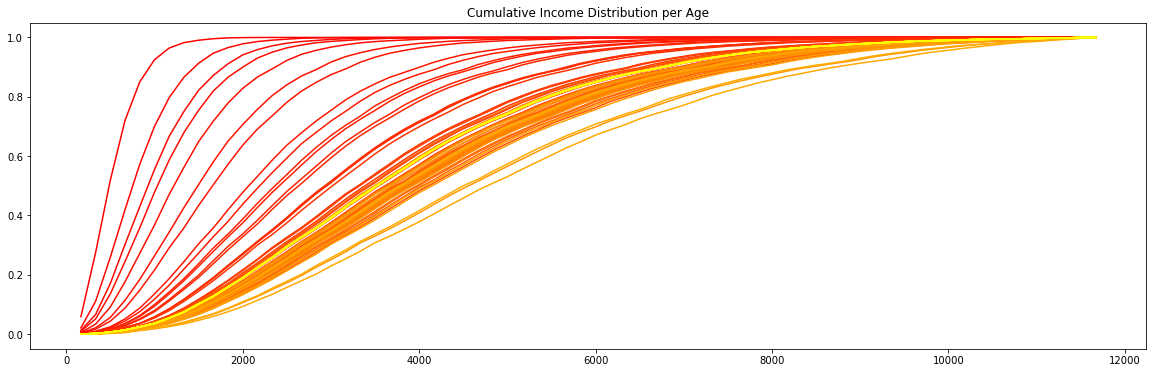

In [159]:
df3d.plot(figsize=(20,6), legend=False, colormap='autumn', title='Cumulative Income Distribution per Age')

<AxesSubplot:title={'center':'Income Distribution per Age'}>

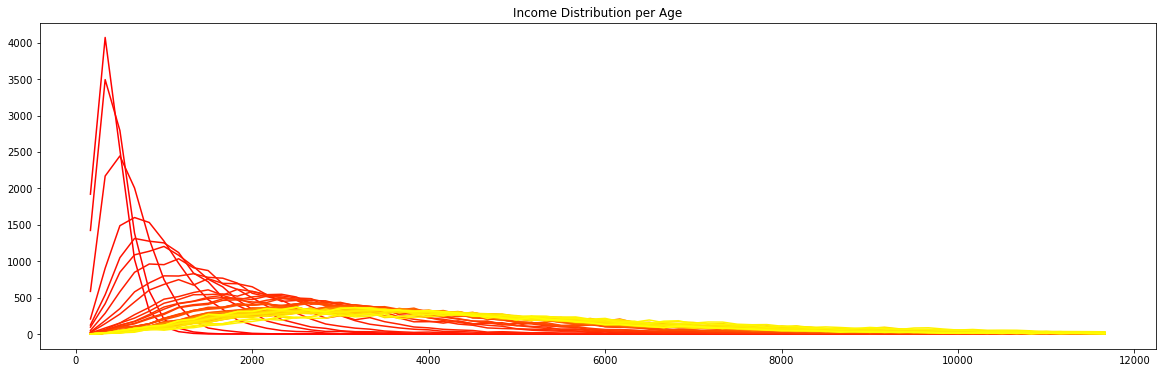

In [160]:
df3d_ri.plot(figsize=(20,6), legend=False, colormap='autumn', title='Income Distribution per Age')

------------------------------------------------------------------------------------------------------------------------------
## Run Model with given Incomes & Cumulative Ratios

In [161]:
model = HousingMarket(rental_cost=2000, incomes=incomes, income_distr=cum_ratios)
model.run_model(20000)
data = model.datacollector
data

TypeError: __init__() got an unexpected keyword argument 'incomes'

In [ ]:
mv = data.get_model_vars_dataframe()    # mv : 'model variables'

## Plotting Model Parameters

In [ ]:
mv.Gini.plot(figsize=(15,5), title='Gini')
mv.columns

In [ ]:
mv['Overall Savings'].plot(figsize=(15,5), title='Overall Savings')

In [ ]:
mv['Mean Income'].plot(figsize=(15, 5), title='Mean Income')